In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

Dataset carregado com 205 amostras e 41 features
COMPOSITOR
Johann Sebastian Bach    58
Ludwig van Beethoven     52
Frédéric Chopin          48
Robert Schumann          47
Name: count, dtype: int64


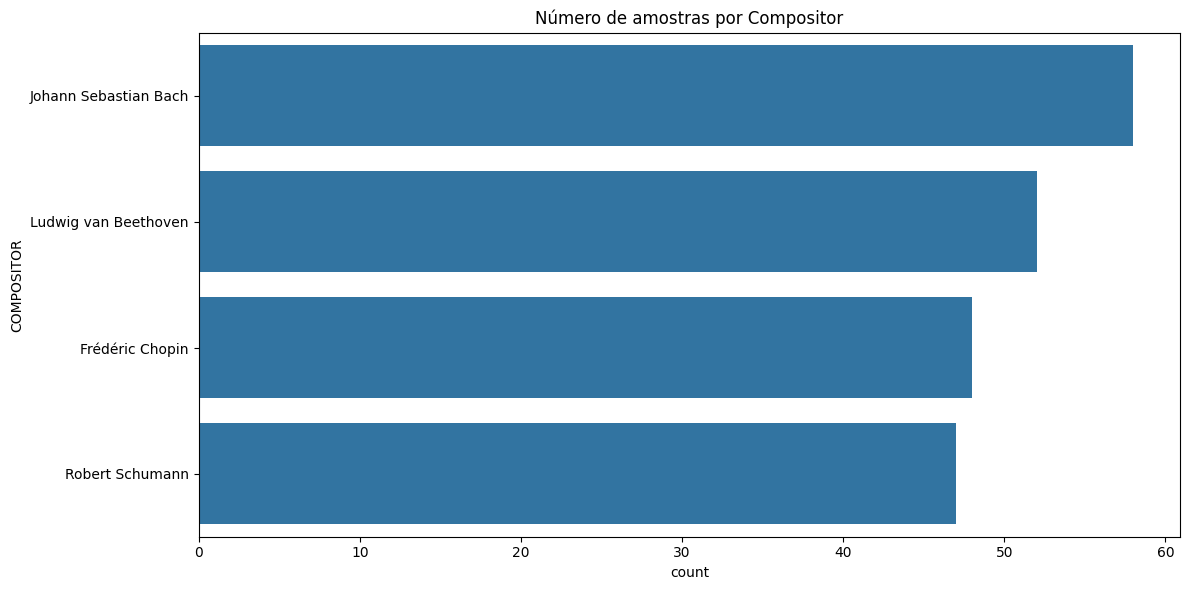

In [150]:
# Carregar os dados
df = pd.read_csv('data.csv')
print(f"Dataset carregado com {df.shape[0]} amostras e {df.shape[1]} features")

# Verificar quantas amostras há por compositor
compositor_counts = df['COMPOSITOR'].value_counts()
print(compositor_counts)

# Visualizar distribuição de compositores
plt.figure(figsize=(12, 6))
sns.countplot(y='COMPOSITOR', data=df, order=df['COMPOSITOR'].value_counts().index)
plt.title('Número de amostras por Compositor')
plt.tight_layout()
plt.savefig('distribuicao_compositores.png')
plt.show()

In [151]:
# Separar features e target
X = df.drop('COMPOSITOR', axis=1)
y = df['COMPOSITOR']

# Normalizar as features (importante quando têm escalas diferentes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


--- Relatório de Classificação ---
                       precision    recall  f1-score   support

      Frédéric Chopin       0.83      0.50      0.62        10
Johann Sebastian Bach       0.71      1.00      0.83        12
 Ludwig van Beethoven       0.75      0.60      0.67        10
      Robert Schumann       0.60      0.67      0.63         9

             accuracy                           0.71        41
            macro avg       0.72      0.69      0.69        41
         weighted avg       0.72      0.71      0.70        41



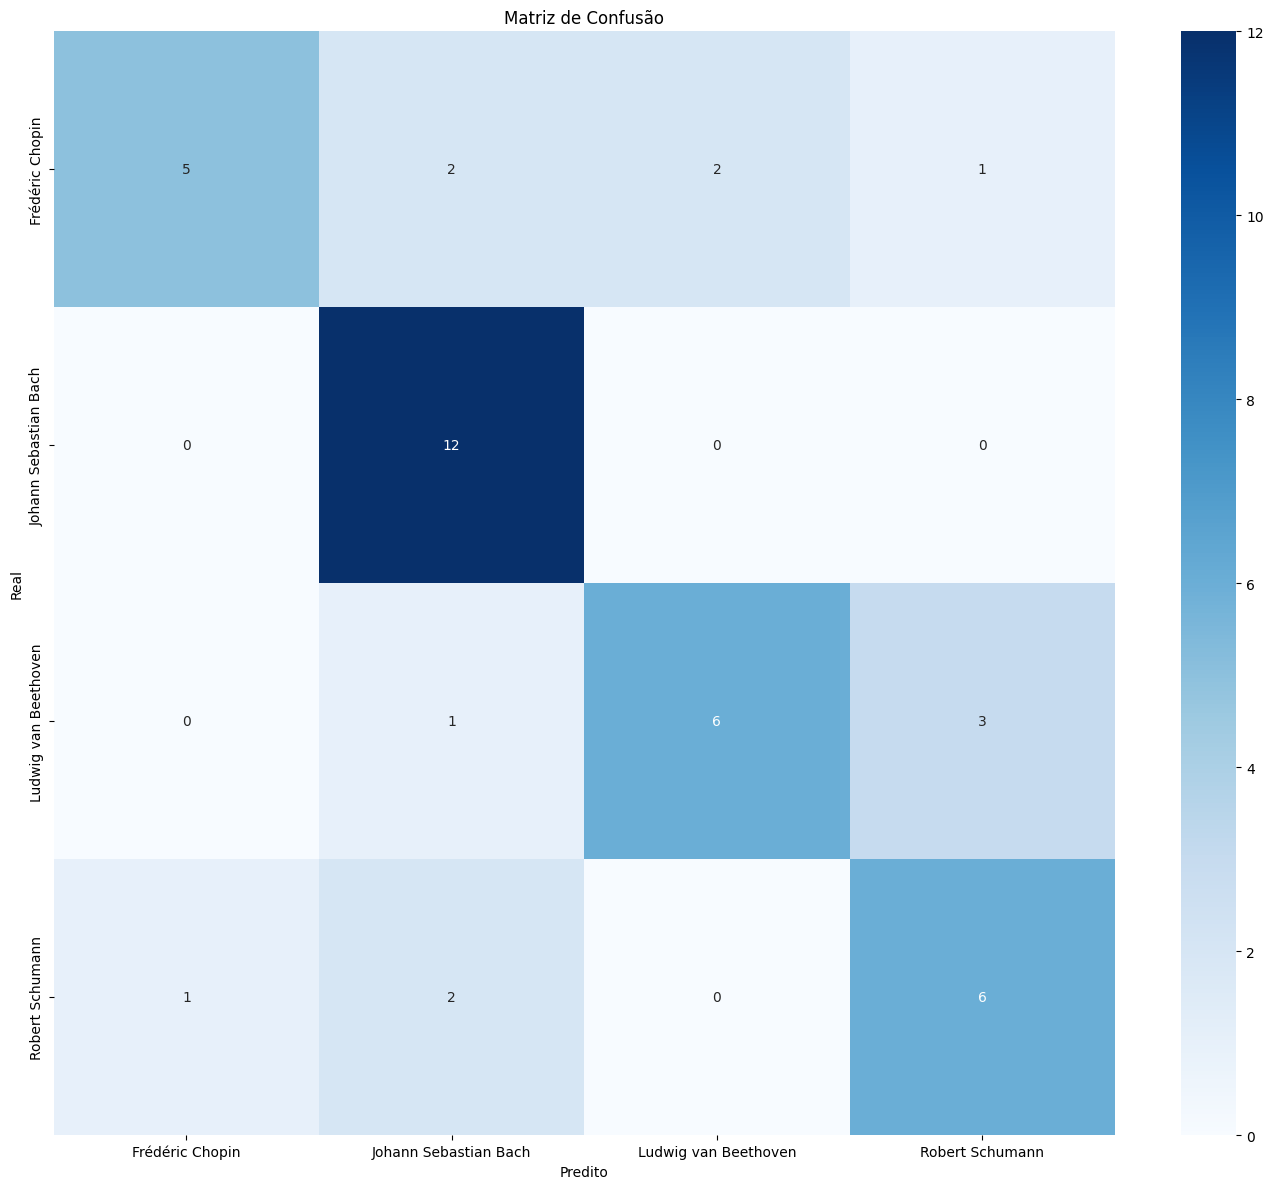

In [152]:
# Criar e treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Avaliar no conjunto de teste
y_pred = rf.predict(X_test)
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

# Visualizar matriz de confusão
plt.figure(figsize=(14, 12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.savefig('matriz_confusao.png')
plt.show()

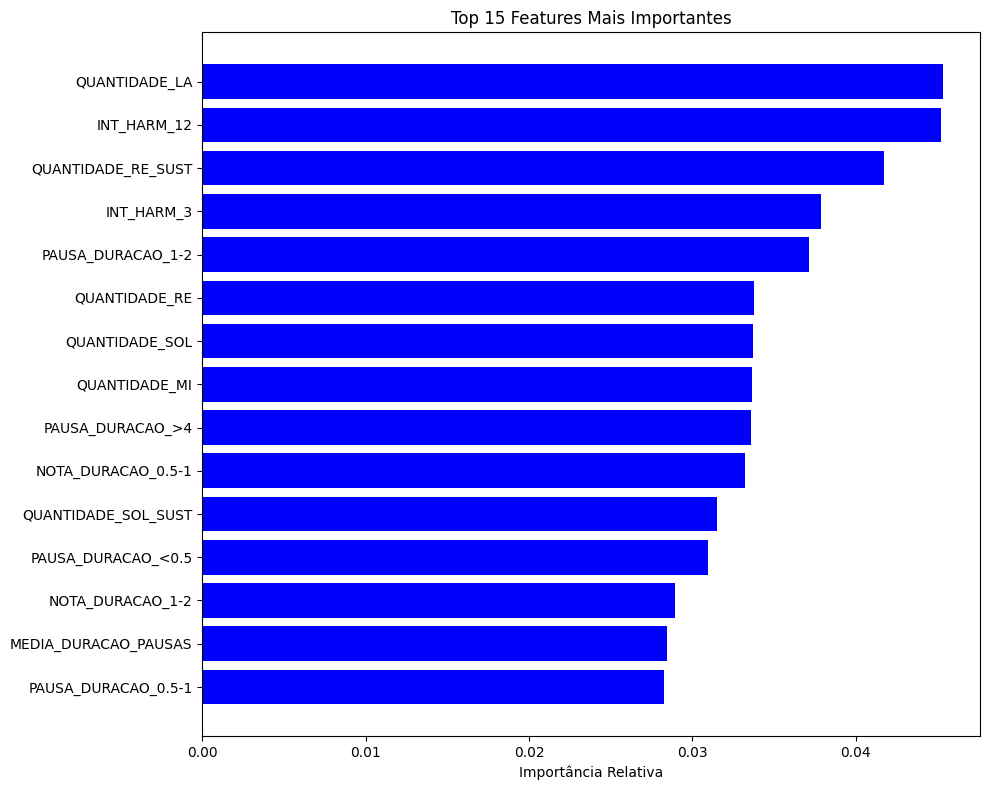

In [153]:
# Visualizar importância das features
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # 15 features mais importantes
plt.figure(figsize=(10, 8))
plt.title('Top 15 Features Mais Importantes')
plt.barh(range(15), importances[indices], color='b', align='center')
plt.yticks(range(15), [X.columns[i] for i in indices])
plt.xlabel('Importância Relativa')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [154]:
# SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("\n--- Desempenho SVM ---")
print(classification_report(y_test, svm_pred))

# Validação cruzada
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
print(f"\nPrecisão média com validação cruzada: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


--- Desempenho SVM ---
                       precision    recall  f1-score   support

      Frédéric Chopin       0.71      0.50      0.59        10
Johann Sebastian Bach       0.85      0.92      0.88        12
 Ludwig van Beethoven       0.55      0.60      0.57        10
      Robert Schumann       0.60      0.67      0.63         9

             accuracy                           0.68        41
            macro avg       0.68      0.67      0.67        41
         weighted avg       0.69      0.68      0.68        41


Precisão média com validação cruzada: 0.6585 ± 0.0913


In [155]:
from sklearn.ensemble import VotingClassifier

# Ensemble de vários classificadores
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
], voting='soft')

ensemble.fit(X_train, y_train)
ens_pred = ensemble.predict(X_test)
print("\n--- Ensemble Model ---")
print(classification_report(y_test, ens_pred))


--- Ensemble Model ---
                       precision    recall  f1-score   support

      Frédéric Chopin       1.00      0.70      0.82        10
Johann Sebastian Bach       0.80      1.00      0.89        12
 Ludwig van Beethoven       0.78      0.70      0.74        10
      Robert Schumann       0.80      0.89      0.84         9

             accuracy                           0.83        41
            macro avg       0.84      0.82      0.82        41
         weighted avg       0.84      0.83      0.83        41

